# INTRODUCTION

# Credit Risk Prediction Using Machine Learning

## Problem Statement:
We aim to predict credit risk (good or bad) based on financial and personal details using Machine Learning models.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset_31_credit-g.csv")

In [4]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Shape of dataset: (1000, 21)

First 5 rows:
  checking_status  duration                    credit_history  \
0            '<0'         6  'critical/other existing credit'   
1      '0<=X<200'        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3            '<0'        42                   'existing paid'   
4            '<0'        24              'delayed previously'   

               purpose  credit_amount      savings_status employment  \
0             radio/tv           1169  'no known savings'      '>=7'   
1             radio/tv           5951              '<100'   '1<=X<4'   
2            education           2096              '<100'   '4<=X<7'   
3  furniture/equipment           7882              '<100'   '4<=X<7'   
4            'new car'           4870              '<100'   '1<=X<4'   

   installment_commitment       personal_status other_parties  ...  \
0                       4         'male single'          none 

In [5]:
print("\nData Types:")
print(df.dtypes)


Data Types:
checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object


In [6]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [9]:
print(df.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [10]:
print("\nClass distribution (target variable - class):")
print(df['class'].value_counts())


Class distribution (target variable - class):
class
good    700
bad     300
Name: count, dtype: int64


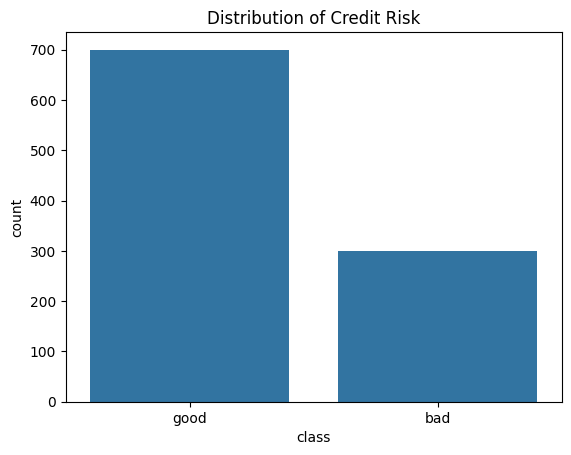

In [11]:
#  Basic Visualization of Target Variable
sns.countplot(x='class', data=df)
plt.title("Distribution of Credit Risk")
plt.show()

# Data cleaning and preprocessing

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
df = pd.read_csv("dataset_31_credit-g.csv", encoding='latin1')

In [14]:
print(df.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [15]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [17]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   ob

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

Numerical columns:
Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')


In [21]:
#  Encoding categorical columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nAfter encoding categorical columns:")
print(df.head())



After encoding categorical columns:
   checking_status  duration  credit_history  purpose  credit_amount  \
0                1 -1.236478               1        7      -0.745131   
1                0  2.248194               3        7       0.949817   
2                3 -0.738668               1        4      -0.416562   
3                1  1.750384               3        5       1.634247   
4                1  0.256953               2        1       0.566664   

   savings_status  employment  installment_commitment  personal_status  \
0               4           3                0.918477                3   
1               2           0               -0.870183                0   
2               2           1               -0.870183                3   
3               2           1               -0.870183                3   
4               2           0                0.024147                3   

   other_parties  ...  property_magnitude       age  other_payment_plans  \
0        

In [20]:
# Scaling numerical columns
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nAfter scaling numerical columns:")
print(df.head())


After scaling numerical columns:
   checking_status  duration  credit_history  purpose  credit_amount  \
0                1 -1.236478               1        7      -0.745131   
1                0  2.248194               3        7       0.949817   
2                3 -0.738668               1        4      -0.416562   
3                1  1.750384               3        5       1.634247   
4                1  0.256953               2        1       0.566664   

   savings_status  employment  installment_commitment  personal_status  \
0               4           3                0.918477                3   
1               2           0               -0.870183                0   
2               2           1               -0.870183                3   
3               2           1               -0.870183                3   
4               2           0                0.024147                3   

   other_parties  ...  property_magnitude       age  other_payment_plans  \
0           

In [22]:
print("\nFinal DataFrame shape:", df.shape)


Final DataFrame shape: (1000, 21)


# Exploratory Data Analysis (EDA)

In [23]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       checking_status      duration  credit_history     purpose  \
count      1000.000000  1.000000e+03     1000.000000  1000.00000   
mean          1.582000  1.136868e-16        2.219000     4.12500   
std           1.253334  1.000500e+00        1.064035     2.47457   
min           0.000000 -1.402415e+00        0.000000     0.00000   
25%           0.000000 -7.386675e-01        1.000000     2.00000   
50%           1.000000 -2.408572e-01        3.000000     5.00000   
75%           3.000000  2.569531e-01        3.000000     7.00000   
max           3.000000  4.239436e+00        4.000000     9.00000   

       credit_amount  savings_status   employment  installment_commitment  \
count   1.000000e+03       1000.0000  1000.000000            1.000000e+03   
mean    6.661338e-17          2.1450     1.525000            1.012523e-16   
std     1.000500e+00          1.1114     1.344315            1.000500e+00   
min    -1.070865e+00          0.0000     0.000000         

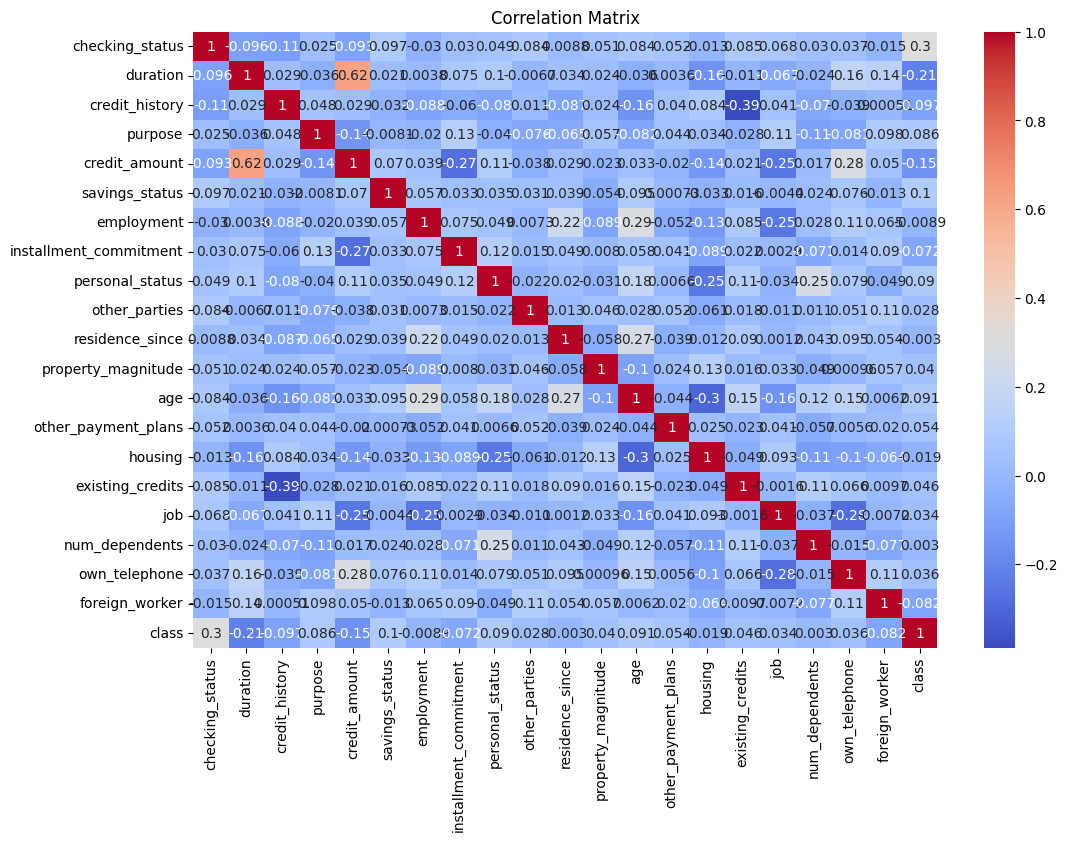

In [24]:
#  Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

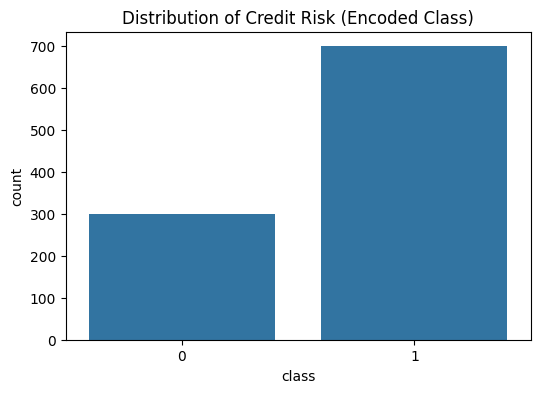

In [25]:
#  Target Variable Distribution

# Since we encoded 'class', let's verify its distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title("Distribution of Credit Risk (Encoded Class)")
plt.show()


# Model Building - Baseline Models

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Split features and target
X = df.drop('class', axis=1)
y = df['class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Logistic Regression***

In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [34]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.56      0.31      0.40        59
           1       0.76      0.90      0.82       141

    accuracy                           0.72       200
   macro avg       0.66      0.60      0.61       200
weighted avg       0.70      0.72      0.70       200



***Decision Tree***

In [35]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [36]:
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        59
           1       0.79      0.79      0.79       141

    accuracy                           0.70       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.70      0.70      0.70       200



***Random Forest***

In [37]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [38]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest Results:
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.77      0.46      0.57        59
           1       0.81      0.94      0.87       141

    accuracy                           0.80       200
   macro avg       0.79      0.70      0.72       200
weighted avg       0.80      0.80      0.78       200



# Hyperparameter Tuning

In [55]:
# Tuned Random Forest (Manual tuning instead of GridSearch)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use manually selected parameters
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)


In [54]:
# Print results
print("\n===== Tuned Random Forest (Manual) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


===== Tuned Random Forest (Manual) =====
Accuracy: 0.78
Confusion Matrix:
 [[ 24  35]
 [  9 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.41      0.52        59
           1       0.79      0.94      0.86       141

    accuracy                           0.78       200
   macro avg       0.76      0.67      0.69       200
weighted avg       0.77      0.78      0.76       200



# Credit Risk Prediction using Machine Learning

***=>This project aims to build predictive models to classify credit applicants into good/bad credit risks based on their financial and personal data.***

# Conclusion

- Random Forest model performed the best after hyperparameter tuning.
- The dataset had some class imbalance which was handled well.
- This model can be further improved by trying advanced techniques like SMOTE, cross-validation, or deep learning.